In [11]:
save_as_manuscript_figure = True
figures_directory = '/Users/jeff/Dropbox/MRC_NetworkScience_clustering/theory (first paper)/graphics/'

fig_one_col = 3.42
fig_two_col = 7.02
from scipy.constants import golden

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style('white')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from clusterrewire import cluster_rewire_graph 
from clusterrewire import number_of_triangles, number_of_triangles_update
from clusterrewire import number_of_possible_triangles, number_of_possible_triangles_update
import networkx as nx

In [4]:
local_clustering = lambda A, A2: nx.average_clustering(nx.from_numpy_matrix(A))
path_length = lambda A, A2: nx.average_shortest_path_length(nx.from_numpy_matrix(A))

In [5]:
def random_graph(n_nodes=100, p=1.5, 
                 connected=True, verbose=False):
    p = p*log(n_nodes)/n_nodes
    g = nx.erdos_renyi_graph(n=n_nodes, p=p)

    if connected:
        try_count = 1
        max_tries = 1000
        while not nx.is_connected(g):
            g = nx.erdos_renyi_graph(n=n_nodes, p=p)
            try_count += 1
            if try_count>max_tries:
                print("Can't make a connected graph. Tried %i times."%max_tries)
                break
    if verbose:
        print("Average degree: %.2f"%mean(list(g.degree().values())))

    return nx.adjacency_matrix(g).todense()

In [6]:
property_functions = [(number_of_triangles, number_of_triangles_update),
                      (number_of_possible_triangles, number_of_possible_triangles_update),
                     local_clustering,
                     path_length
                     ]

In [7]:
basic_example_n_nodes = 100
basic_x_label = 'Number of Rewirings'

In [64]:
A = random_graph(basic_example_n_nodes)
A_rewired, (n_triangles, 
    n_triangles_possible,
    C_locals, 
    pl) = cluster_rewire_graph(A, verbose=False,
                               property_functions=property_functions)
Cs = array(n_triangles)/array(n_triangles_possible)
C_locals = array(C_locals)
pl = array(pl)
x = arange(len(Cs))#/len(Cs)

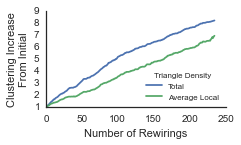

In [37]:
fig = figure(figsize=(fig_one_col, fig_one_col/golden))

plot(x,Cs/Cs[0], label="Total")
plot(x, C_locals/C_locals[0], label="Average Local")
ylabel("Clustering Increase\nFrom Initial")
# title("Clustering Goes Up, With Two Definitions")
xlabel(basic_x_label)

lg = legend(loc=4, title="Triangle Density", fontsize=8)
lg.draw_frame(False)
setp(lg.get_title(),fontsize=8)

sns.despine()

fig.tight_layout()
if save_as_manuscript_figure:
    fig_name = "Total_vs_Local_Triangle_Density"
    fig.savefig(figures_directory+fig_name+'.pdf')

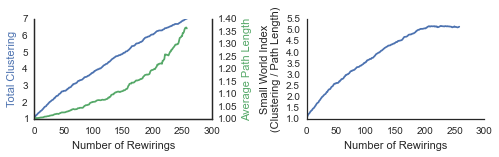

In [66]:
fig = figure(figsize=(fig_two_col, fig_two_col/golden/2))

n_cols = 2
n_rows = 1
ax = fig.add_subplot(n_rows,n_cols,1)

l = plot(x,Cs/Cs[0], label="Clustering")
ylabel("Total Clustering", color=l[0].get_color())
xlabel(basic_x_label)


ax = ax.twinx()
# ax.yaxis.tick_right()
l = ax.plot(x, pl/pl[0], label="Average Path Length", color=sns.color_palette()[1])
ax.set_ylabel("Average Path Length", color=l[0].get_color())

sns.despine(right=False)
# title("Path Length Also Increases, Though More Slowly")

ax = fig.add_subplot(n_rows,n_cols,2)
Gamma = Cs/Cs[0]
Lambda = pl/pl[0]

swi = Gamma/Lambda

plot(x,swi)
# text(.7, .5, "Clustering / Path Length,\nCompared to Initial", transform=ax.transAxes, horizontalalignment='center')
ylabel("Small World Index\n(Clustering / Path Length)")
xlabel(basic_x_label)
# title("Small World Index Grows with Rewiring, then Plateaus")
sns.despine(ax=ax)

fig.tight_layout()
if save_as_manuscript_figure:
    fig_name = "Small_World"
    fig.savefig(figures_directory+fig_name+'.pdf')

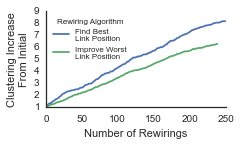

In [41]:
fig = figure(figsize=(fig_one_col, fig_one_col/golden))

A = random_graph(basic_example_n_nodes)
A_rewired, (n_triangles, 
    n_triangles_possible) = cluster_rewire_graph(A, verbose=False)
Cs_global_optimal = array(n_triangles)/array(n_triangles_possible)

x = arange(len(Cs_global_optimal))#/len(Cs)

plot(x,Cs_global_optimal/Cs_global_optimal[0], label="Find Best\nLink Position")

####
from clusterrewire import one_move_improve_worst

A_rewired, (n_triangles, 
    n_triangles_possible) = cluster_rewire_graph(A, verbose=False, 
                                                 rewire_function=one_move_improve_worst)
Cs_local_optimal = array(n_triangles)/array(n_triangles_possible)

x = arange(len(Cs_local_optimal))#/len(Cs)

plot(x, Cs_local_optimal/Cs_local_optimal[0], label="Improve Worst\nLink Position")


###
ylabel("Clustering Increase\nFrom Initial")
# title("Clustering Goes Up, With Two Definitions")
xlabel(basic_x_label)

lg = legend(loc=2, title="Rewiring Algorithm", fontsize=8)
lg.draw_frame(False)
setp(lg.get_title(),fontsize=8)

sns.despine()
fig.tight_layout()
if save_as_manuscript_figure:
    fig_name = "Find_Best_vs_Improve_Worst"
    fig.savefig(figures_directory+fig_name+'.pdf')

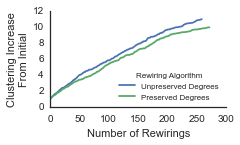

In [35]:
fig = figure(figsize=(fig_one_col, fig_one_col/golden))

A = random_graph(basic_example_n_nodes)
A_rewired, (n_triangles, 
    n_triangles_possible) = cluster_rewire_graph(A, verbose=False)
Cs_degrees_unpreserved = array(n_triangles)/array(n_triangles_possible)

x = arange(len(Cs_degrees_unpreserved))#/len(Cs)

plot(x,Cs_degrees_unpreserved/Cs_degrees_unpreserved[0], label="Unpreserved Degrees")

####
A_rewired, (n_triangles, 
    n_triangles_possible) = cluster_rewire_graph(A, verbose=False, 
                                                 preserve_degrees=True)
Cs_degrees_preserved = array(n_triangles)/array(n_triangles_possible)

x = arange(len(Cs_degrees_preserved))#/len(Cs)

plot(x, Cs_degrees_preserved/Cs_degrees_preserved[0], label="Preserved Degrees")


###
ylabel("Clustering Increase\nFrom Initial")
xlabel(basic_x_label)

lg = legend(loc=4, title="Rewiring Algorithm", fontsize=8)
lg.draw_frame(False)
setp(lg.get_title(),fontsize=8)


sns.despine()

fig.tight_layout()
if save_as_manuscript_figure:
    fig_name = "Unpreserved_vs_Preserved"
    fig.savefig(figures_directory+fig_name+'.pdf')

In [44]:
ns = [100,200]#, 500]#, 1000]

C_dict = {}
n_links_dict = {}
for n_nodes in ns:
    print(n_nodes)
    A = random_graph(n_nodes)
    A_rewired, (n_triangles, 
        n_triangles_possible) = cluster_rewire_graph(A, verbose=False)
    Cs = array(n_triangles)/array(n_triangles_possible)
    C_dict[n_nodes] = Cs
    n_links_dict[n_nodes] = A.sum()/2
#percents = arange(len(Cs))/len(Cs)


100
200


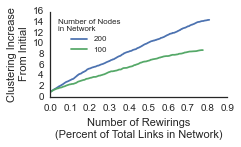

In [63]:
fig = figure(figsize=(fig_one_col, fig_one_col/golden))

for n_nodes in C_dict.keys():
    x = arange(len(C_dict[n_nodes])).astype('float')
    x /= n_links_dict[n_nodes]
    plot(x, C_dict[n_nodes]/C_dict[n_nodes][0], label=n_nodes)

ylabel("Clustering Increase\nFrom Initial")
xlabel(basic_x_label+'\n(Percent of Total Links in Network)')

lg = legend(loc=2, title="Number of Nodes\nin Network", fontsize=8)
lg.draw_frame(False)
setp(lg.get_title(),fontsize=8)


sns.despine()

fig.tight_layout()
if save_as_manuscript_figure:
    fig_name = "Network_Size"
    fig.savefig(figures_directory+fig_name+'.pdf')